In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('./data/author_score_3.json', 'r') as f:
    author_score = json.load(f, encoding='utf-8')

### Keywords popularities reduction

In [3]:
with open('./data/keyword_year_new.json', 'r') as f:
    keywords = json.load(f, encoding='utf-8')

In [4]:
keywords_year = [0] * (2018-1800+1)
for key in keywords:
    for idx in range(len(keywords[key])):
        keywords_year[idx] += keywords[key][idx]

In [5]:
keywords['machine learning'][-5]/keywords_year[-5]

0.01093580091813284

In [6]:
np.log10(keywords_year[-5])

6.499911593306379

### id -> keywords coef
For article in Computer science, keyword "computer science" will be applied. The same with physics.
Calculate the ratio total amount of keywords of amount of all keywords in a particular year
ratio considers year of publishing
Divide coef = 2 \*\* -ratio

In [7]:
with open('./data/mag_list_noid.json', 'r') as f:
    mag_list = json.load(f, encoding='utf-8')

In [8]:
keywords_coef = []
for idx, row in enumerate(mag_list):
    year = row['year']-1800
    keyword_article_count = 0;
    fos = json.loads(row['fos'])
    isNA = False
    if row['field'] == 'Computer Science' and 'computer science' not in fos:
        fos.append('computer science')
    elif row['field'] == 'Physics' and 'physics' not in fos:
        fos.append('physics')
    elif row['field'] != 'Computer Science' and row['field'] == 'Physics':
        isNA = True
#     print(fos)
    for keyword in fos:
        keyword_article_count += keywords[keyword][year]
        
    keywords_coef.append(2**(keyword_article_count * np.log10(keywords_year[year]) / 2 / keywords_year[year]))

In [9]:
len(keywords_coef)

11763764

In [51]:
# keywords_coef.sort()

In [55]:
# keywords_coef[-10:]

[1.669021838695741,
 1.669800957007489,
 1.6724908905858966,
 1.6741925131014184,
 1.6751490223184957,
 1.6754889383809464,
 1.6766674752864545,
 1.679120874370315,
 1.683348212955556,
 1.70246555965533]

In [57]:
with open('./data/keywords_coef.json', 'w') as f:
    json.dump(keywords_coef, f, ensure_ascii=False)

### author in  computer science or physics

In [11]:
for author in author_score:
    row = author_score[author]
    cs_cnt = 0
    phy_cnt = 0
    for iid in row['id']:
        if mag_list[iid]['field'] == 'Computer Science':
            cs_cnt += 1
        elif mag_list[iid]['field'] == 'Physics':
            phy_cnt += 1
    if cs_cnt >= phy_cnt:
        author_score[author]['major'] = 'Computer Science'
    else:
        author_score[author]['major'] = 'Physics'

In [33]:
for author in author_score:
    print(author, author_score[author])
    break

Hsin-chou Huang {'id': [0, 1013803, 8227147, 8634565, 9327239], 'order': [0, 0, 0, 0, 0], 'rank_score': [1.6881689914910116e-08, 7.350522653078802e-09, 8.586583277910506e-09, 7.679991052985015e-09, 6.018948954548428e-09], 'score': 0.4193025894424839, 'major': 'Computer Science'}


### keywords coef -> rank_score

### Calculate score for authors

In [45]:
pure_score = {}
for author in author_score:
    score = 0
    row = author_score[author]
    for idx in range(len(row['id'])):
        score += row['rank_score'][idx] * (2**-row['order'][idx]) / keywords_coef[idx]
    author_score[author]['score'] = score
    pure_score[author] = score

In [46]:
len(pure_score)

6872744

In [47]:
pure_score_np = np.array(list(pure_score.values()))
score_mean = np.mean(pure_score_np)
score_dev = np.std(pure_score_np)

In [48]:
for author in pure_score:
    pure_score[author] = (pure_score[author] - score_mean) / score_dev
for author in author_score:
    author_score[author]['score'] = (author_score[author]['score'] - score_mean) / score_dev

In [49]:
nauthor_score_np = np.array(list(pure_score.values()))
nscore_mean = np.mean(nauthor_score_np)
nscore_dev = np.std(nauthor_score_np)
nscore_mean, nscore_dev

(2.7760273198654865e-16, 0.9999999999999996)

In [57]:
with open('./data/author_pure_score_keywords_3.json', 'w') as f:
    json.dump(pure_score, f, ensure_ascii=False)

In [58]:
with open('./data/author_score_3_final.json', 'w') as f:
    json.dump(author_score, f, ensure_ascii=False)

### Score ranking

In [50]:
import operator
sorted_x = sorted(pure_score.items(), key=operator.itemgetter(1))
sorted_x.reverse()
sorted_x

[('Claude E. Shannon', 375.55621782931564),
 ('Azriel Rosenfeld', 346.6186886050344),
 ('Ronald L. Rivest', 308.6669564250298),
 ('H. Nyquist', 301.8489540188178),
 ('Alfred V. Aho', 300.58521826829696),
 ('Lawrence R. Rabiner', 296.43239585499936),
 ('Gerard Salton', 253.64773454338237),
 ('C. A. R. Hoare', 231.89260798164466),
 ('Rakesh Agrawal', 226.1760679976983),
 ('Donald E. Knuth', 222.63149325501894),
 ('Leonard Kleinrock', 220.74583334829032),
 ('Whitfield Diffie', 218.8482406397951),
 ('M. H. Kalos', 194.47283666378414),
 ('Brian P. Flannery', 193.95309609890538),
 ('Lotfi A. Zadeh', 193.89525899248312),
 ('David E. Goldberg', 192.94715702300778),
 ('Adi Shamir', 192.76345451448887),
 ('Leslie Lamport', 186.29262041455067),
 ('John G. Kirkwood', 184.5473565741609),
 ('E. F. Codd', 181.31722745521913),
 ('Bernard Widrow', 180.02330942553866),
 ('Anil K. Jain', 179.47949126471065),
 ('Teuvo Kohonen', 176.77976737019145),
 ('John E. Hopcroft', 175.6096535781819),
 ('David Marr',

In [51]:
author_score_desc = {}
for item in sorted_x:
    author_score_desc[item[0]] = item[1]

In [52]:
next(iter(author_score_desc.values()))

375.55621782931564

In [53]:
with open('./data/author_pure_score_desc_keywords_3.json', 'w') as f:
    json.dump(author_score_desc, f, ensure_ascii=False)

In [54]:
df = pd.DataFrame.from_dict(author_score, orient='index').reset_index()
df.rename(columns=dict(zip(df.columns[[0]], ['author'])),inplace=True)
df = df.set_index('author')

In [55]:
df = df.sort_values(by=['score'], ascending=[False])

In [56]:
df.head(20)

,id,order,rank_score,score,major
author,,,,,
Claude E. Shannon,"[341178, 514168, 649221, 1320120, 2254636, 278...","[1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, ...","[4.845181680354769e-08, 3.866702431318541e-09,...",375.556218,Computer Science
Azriel Rosenfeld,"[18577, 97426, 138315, 163657, 182665, 188328,...","[1, 4, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, ...","[5.522814273492413e-08, 9.017523185112184e-09,...",346.618689,Computer Science
Ronald L. Rivest,"[142679, 157237, 274288, 478725, 501079, 51033...","[1, 5, 2, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[6.476421678632808e-10, 4.0238189589320356e-09...",308.666956,Computer Science
H. Nyquist,"[1618828, 5954566, 6720825, 7236624, 9158623, ...","[0, 0, 0, 0, 0, 0]","[1.6622808732144266e-05, 4.20353522427469e-06,...",301.848954,Computer Science
Alfred V. Aho,"[125362, 281461, 408734, 682344, 759220, 76207...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1.0315398885268477e-08, 5.798781935762541e-10...",300.585218,Computer Science
Lawrence R. Rabiner,"[14225, 44194, 105429, 397619, 426743, 500639,...","[1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 7, ...","[1.9469210035338378e-08, 3.2565115365821056e-0...",296.432396,Computer Science
Gerard Salton,"[29693, 53067, 93609, 158937, 202960, 223284, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1.2418957917799743e-09, 8.08214241533528e-09,...",253.647735,Computer Science
C. A. R. Hoare,"[135208, 691801, 899195, 1013288, 1366920, 192...","[0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.9573441116174965e-09, 4.598260651049764e-09...",231.892608,Computer Science
Rakesh Agrawal,"[20130, 30115, 69508, 128856, 180445, 321261, ...","[2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[6.58393463351224e-09, 2.5888360888276314e-08,...",226.176068,Computer Science


In [59]:
df.to_csv('./data/author_score_3_descend.csv', encoding='utf-8')

In [60]:
df_cs100 = df.loc[df.major == 'Computer Science'].head(100)

In [61]:
df_cs100

,id,order,rank_score,score,major
author,,,,,
Claude E. Shannon,"[341178, 514168, 649221, 1320120, 2254636, 278...","[1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, ...","[4.845181680354769e-08, 3.866702431318541e-09,...",375.556218,Computer Science
Azriel Rosenfeld,"[18577, 97426, 138315, 163657, 182665, 188328,...","[1, 4, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, ...","[5.522814273492413e-08, 9.017523185112184e-09,...",346.618689,Computer Science
Ronald L. Rivest,"[142679, 157237, 274288, 478725, 501079, 51033...","[1, 5, 2, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[6.476421678632808e-10, 4.0238189589320356e-09...",308.666956,Computer Science
H. Nyquist,"[1618828, 5954566, 6720825, 7236624, 9158623, ...","[0, 0, 0, 0, 0, 0]","[1.6622808732144266e-05, 4.20353522427469e-06,...",301.848954,Computer Science
Alfred V. Aho,"[125362, 281461, 408734, 682344, 759220, 76207...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1.0315398885268477e-08, 5.798781935762541e-10...",300.585218,Computer Science
Lawrence R. Rabiner,"[14225, 44194, 105429, 397619, 426743, 500639,...","[1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 7, ...","[1.9469210035338378e-08, 3.2565115365821056e-0...",296.432396,Computer Science
Gerard Salton,"[29693, 53067, 93609, 158937, 202960, 223284, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1.2418957917799743e-09, 8.08214241533528e-09,...",253.647735,Computer Science
C. A. R. Hoare,"[135208, 691801, 899195, 1013288, 1366920, 192...","[0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.9573441116174965e-09, 4.598260651049764e-09...",231.892608,Computer Science
Rakesh Agrawal,"[20130, 30115, 69508, 128856, 180445, 321261, ...","[2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[6.58393463351224e-09, 2.5888360888276314e-08,...",226.176068,Computer Science


In [62]:
df_cs100.to_csv('./data/author_score_3_cs100.csv', encoding='utf-8')

In [63]:
df_phy100 = df.loc[df.major == 'Physics'].head(100)

In [64]:
df_phy100

,id,order,rank_score,score,major
author,,,,,
M. H. Kalos,"[51781, 184829, 302355, 322525, 549267, 639038...","[1, 2, 3, 0, 1, 1, 0, 2, 2, 1, 2, 3, 2, 1, 4, ...","[7.955503603701052e-07, 1.721172667724948e-10,...",194.472837,Physics
Brian P. Flannery,"[219469, 510519, 663027, 713938, 938154, 95033...","[2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, ...","[7.085233366152944e-10, 3.012273567478747e-09,...",193.953096,Physics
John G. Kirkwood,"[55480, 126515, 347095, 399562, 458664, 606781...","[0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, ...","[2.2794310950021683e-07, 4.9463805153334964e-0...",184.547357,Physics
Horatio Scott Carslaw,[3532852],[0],[1.2367245523767375e-05],169.013964,Physics
G. K. Batchelor,"[119910, 195497, 696264, 791434, 892070, 10772...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.342694694066821e-07, 1.4736233961870685e-09...",167.883626,Physics
Max Born,"[667795, 1087199, 1158268, 1592650, 1662893, 1...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, ...","[4.2636901969619276e-09, 6.554391325187153e-10...",160.007552,Physics
L.D. Landau,"[103613, 111215, 189713, 769201, 1067937, 1225...","[1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[8.864399697565904e-10, 1.474206862219068e-09,...",158.014420,Physics
Edward Witten,"[12518, 43158, 118343, 124006, 138480, 160120,...","[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 1, 0, 0, ...","[1.3063038896194912e-09, 9.520668655180481e-08...",126.308535,Physics
Richard Bellman,"[94897, 120390, 311122, 620839, 675952, 724750...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.181031945413126e-08, 4.369529751302428e-10,...",122.539398,Physics


In [65]:
df_phy100.to_csv('./data/author_score_3_phy100.csv', encoding='utf-8')

### Score distribution

In [3]:
df = pd.read_csv('./data/author_score_3_descend.csv', encoding='utf-8').set_index('author')

In [4]:
df.head()

,id,order,rank_score,score,major
author,,,,,
Claude E. Shannon,"[341178, 514168, 649221, 1320120, 2254636, 278...","[1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, ...","[4.845181680354769e-08, 3.866702431318541e-09,...",375.556218,Computer Science
Azriel Rosenfeld,"[18577, 97426, 138315, 163657, 182665, 188328,...","[1, 4, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, ...","[5.522814273492413e-08, 9.017523185112184e-09,...",346.618689,Computer Science
Ronald L. Rivest,"[142679, 157237, 274288, 478725, 501079, 51033...","[1, 5, 2, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[6.476421678632808e-10, 4.0238189589320356e-09...",308.666956,Computer Science
H. Nyquist,"[1618828, 5954566, 6720825, 7236624, 9158623, ...","[0, 0, 0, 0, 0, 0]","[1.6622808732144266e-05, 4.20353522427469e-06,...",301.848954,Computer Science
Alfred V. Aho,"[125362, 281461, 408734, 682344, 759220, 76207...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1.0315398885268477e-08, 5.798781935762541e-10...",300.585218,Computer Science


In [5]:
cs_score_list = list(df.loc[df.major == 'Computer Science']['score'])
phy_score_list = list(df.loc[df.major == 'Physics']['score'])

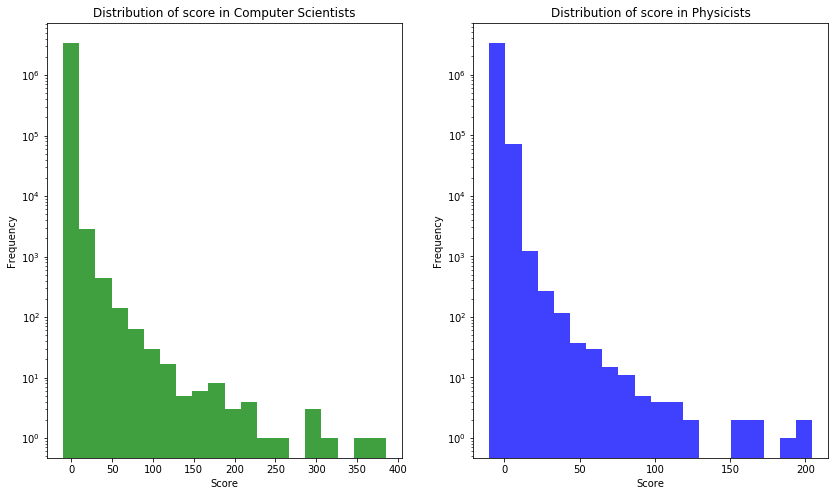

In [13]:
plt.figure(num=None, figsize=(14, 8))
plt.subplot(121)
# the histogram of the data
n, bins, patches = plt.hist(cs_score_list, 20, range=(-10, max(cs_score_list)+10), facecolor='green', alpha=0.75, log=True)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(r'Distribution of score in Computer Scientists')
plt.subplot(122)
n, bins, patches = plt.hist(phy_score_list, 20, range=(-10, max(phy_score_list)+10), facecolor='blue', alpha=0.75, log=True)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(r'Distribution of score in Physicists')
plt.show()

In [18]:
df['len'] = df['id'].apply(lambda x: len(json.loads(x)))

In [19]:
df.sort_values('')

,id,order,rank_score,score,major,len
author,,,,,,
Claude E. Shannon,"[341178, 514168, 649221, 1320120, 2254636, 278...","[1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, ...","[4.845181680354769e-08, 3.866702431318541e-09,...",375.556218,Computer Science,27
Azriel Rosenfeld,"[18577, 97426, 138315, 163657, 182665, 188328,...","[1, 4, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, ...","[5.522814273492413e-08, 9.017523185112184e-09,...",346.618689,Computer Science,438
Ronald L. Rivest,"[142679, 157237, 274288, 478725, 501079, 51033...","[1, 5, 2, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[6.476421678632808e-10, 4.0238189589320356e-09...",308.666956,Computer Science,188
H. Nyquist,"[1618828, 5954566, 6720825, 7236624, 9158623, ...","[0, 0, 0, 0, 0, 0]","[1.6622808732144266e-05, 4.20353522427469e-06,...",301.848954,Computer Science,6
Alfred V. Aho,"[125362, 281461, 408734, 682344, 759220, 76207...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[1.0315398885268477e-08, 5.798781935762541e-10...",300.585218,Computer Science,125


### old version

In [2]:
with open('./data/rank_score_3_list.json', 'r') as f:
    score = json.load(f, encoding='utf-8')

In [3]:
with open('./data/id_author_list_3.json', 'r') as f:
    mag_list = json.load(f, encoding='utf-8')

In [13]:
author_dict = {} 

In [14]:
for idx, author_list in enumerate(mag_list):
    print(idx) if idx % 1000000 == 0 else None
    order = 0
    al = json.loads(author_list, encoding='utf-8')
    for author in al:
        if author not in author_dict:
            author_dict[author] = {'id': [], 'rank_score': []}
        author_dict[author]['id'].append(idx)
        order += 1
        author_dict[author]['rank_score'].append(score[idx]*(2**-order)*(10**8))

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000


In [15]:
with open('./data/author_score_3.json', 'w') as f:
    json.dump(author_dict, f, ensure_ascii=False)

### Calculate authors' scores

In [16]:
author_score = {}
for idx, author in enumerate(author_dict):
    print(idx) if idx % 1000000 == 0 else None
    author_score[author] = 0
    for rank_score in author_dict[author]['rank_score']:
        author_score[author] += rank_score

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000


In [17]:
author_score_np = np.array(list(author_score.values()))
score_mean = np.mean(author_score_np)
score_dev = np.std(author_score_np)

In [18]:
for author in author_score:
    author_score[author] = (author_score[author] - score_mean) / score_dev

In [19]:
nauthor_score_np = np.array(list(author_score.values()))
nscore_mean = np.mean(nauthor_score_np)
nscore_dev = np.std(nauthor_score_np)
nscore_mean, nscore_dev

(-1.6385434361390532e-16, 1.0000000000000009)

In [20]:
with open('./data/author_rank_score_3.json', 'w') as f:
    json.dump(author_score, f, ensure_ascii=False)

### score ranking

In [21]:
import operator
sorted_x = sorted(author_score.items(), key=operator.itemgetter(1))
sorted_x.reverse()
sorted_x

[('Wei Wang', 332.89233433359453),
 ('Wei Zhang', 268.3878326598048),
 ('Wei Li', 257.07322686303905),
 ('Lei Zhang', 212.11773285638813),
 ('Jun Wang', 199.20463522929913),
 ('Rakesh Agrawal', 198.1406081068322),
 ('Lei Wang', 196.13969519296805),
 ('Wei Liu', 193.72806821470923),
 ('Wei Chen', 190.14833577282334),
 ('L.D. Landau', 189.9614626036555),
 ('Yang Liu', 186.8903360985938),
 ('Anil K. Jain', 185.26794774327448),
 ('Ian T. Foster', 179.4265093038561),
 ('Li Li', 177.04933483432018),
 ('G. M. Sheldrick', 172.38304011440417),
 ('Lawrence R. Rabiner', 169.50598728016925),
 ('Yan Zhang', 167.24898790770553),
 ('Yan Li', 166.9048313205391),
 ('Jun Zhang', 164.6438678984649),
 ('Li Zhang', 164.4516185448125),
 ('Max Born', 159.94573572489162),
 ('Jun Li', 157.35142918393592),
 ('Jing Wang', 155.16823936095057),
 ('Edward Witten', 155.05177838397864),
 ('Brian P. Flannery', 152.88609796672938),
 ('Gerard Salton', 149.7025715053787),
 ('Hui Zhang', 149.5682940464655),
 ('Hui Li', 14

In [13]:
with open('./data/author_rank_score_20.json', 'r') as f:
    rs = json.load(f, encoding='utf-8')

In [14]:
import operator
sorted_x1 = sorted(rs.items(), key=operator.itemgetter(1))
sorted_x1.reverse()
sorted_x1

[('Wei Wang', 334.0045739493004),
 ('Wei Zhang', 269.3224773027356),
 ('Wei Li', 257.89376278154407),
 ('Lei Zhang', 212.86421588791083),
 ('Jun Wang', 199.89606115197182),
 ('Lei Wang', 196.8124057581855),
 ('Rakesh Agrawal', 196.05583025765105),
 ('Wei Liu', 194.41022333263632),
 ('Wei Chen', 190.79525995781918),
 ('L.D. Landau', 189.54199528893102),
 ('Yang Liu', 187.55726929376564),
 ('Anil K. Jain', 184.05835732589895),
 ('Ian T. Foster', 178.43278852005878),
 ('Li Li', 177.63694096409947),
 ('G. M. Sheldrick', 173.02299471329997),
 ('Lawrence R. Rabiner', 168.2114351575232),
 ('Yan Zhang', 167.82455669590414),
 ('Yan Li', 167.5036011477119),
 ('Jun Zhang', 165.20775345961306),
 ('Li Zhang', 165.0146133875984),
 ('Max Born', 159.67052619819313),
 ('Jun Li', 157.88867183816723),
 ('Jing Wang', 155.69596095515905),
 ('Edward Witten', 153.94692713783385),
 ('Brian P. Flannery', 152.73108886557796),
 ('Hui Zhang', 149.59967861611077),
 ('Hui Li', 148.17253350036188),
 ('Gerard Salton'

### id_author csv->json

In [2]:
print('Read file', 0)
df = pd.read_csv('./data/id_author.csv', encoding='utf-8', dtype={'field':str})
print('df length', len(df))
mag_dict = df.to_dict('index')
df = None
print('To dict')

Read file 0
df length 23720205
To dict


In [3]:
with open('./data/id_author.json', 'w') as f:
    json.dump(mag_dict, f, ensure_ascii=False)

### Store score only from rank_score

In [2]:
with open('./data/pagerank_3.json', 'r') as f:
    cite_dict = json.load(f, encoding='utf-8')

In [3]:
score = {}
for iid in cite_dict:
    score[iid] = cite_dict[iid]['rank_score']

In [4]:
with open('./data/rank_score_3.json', 'w') as f:
    json.dump(score, f, ensure_ascii=False)

### concat new_reduced

In [ ]:
id_author = {}

print('Read file', 0)
df = pd.read_csv('./data/mag_new_reduced.csv', encoding='utf-8', dtype={'field':str})
print('df length', len(df))

In [12]:
df1 = df[['authors']]

In [14]:
df1.to_csv('./data/id_author.csv', encoding='utf-8')

In [9]:
df = df.set_index('id')

In [13]:
df1.head()

,authors
id,
000000b8-7f59-49ad-b9bc-e92aa858fc37,"[""Hsin-chou Huang"", ""Chiou-lan Chern"", ""Chih-c..."
0000015a-5721-4f2a-ac3f-a67ccd9812e0,"[""Bing Fang"", ""Mengnan Zhang"", ""Mai Tian"", ""Re..."
000001c0-7bca-4c04-8668-75e693e81b7f,"[""雷リスク調査研究委員会発変電雷リスク分科会""]"
000001ed-d83e-44d1-a95f-4e9ac13d9a39,"[""Mark John Ebersole""]"
00000237-cab2-43ae-ae63-9012f15afa2c,"[""Kh. M. Beshtoev""]"


### Remove repeated

In [2]:
with open('./data/rank_score_3.json', 'r') as f:
    score = json.load(f, encoding='utf-8')

In [3]:
with open('./data/id_author.json', 'r') as f:
    mag_dict = json.load(f, encoding='utf-8')

In [4]:
new_score = {}
for idx, iid0 in enumerate(mag_dict):
    iid = mag_dict[iid0]['id']
    if iid in score:
        new_score[iid] = score[iid]

In [5]:
for iid0, iids in zip(mag_dict, new_score):
    iid = mag_dict[iid0]['id']
    if iids != iid:
        print(iid, iids)
        break

In [6]:
with open('./data/rank_score_3_new.json', 'w') as f:
    json.dump(new_score, f, ensure_ascii=False)

In [7]:
author_list = []
for iid0 in mag_dict:
    author_list.append(mag_dict[iid0]['authors'])

In [8]:
score_list = []
for iid in new_score:
    score_list.append(new_score[iid])

In [9]:
len(author_list), len(score_list)

(23720205, 23720205)

In [10]:
with open('./data/id_author_list_3.json', 'w') as f:
    json.dump(author_list, f, ensure_ascii=False)

In [11]:
with open('./data/rank_score_3_list.json', 'w') as f:
    json.dump(score_list, f, ensure_ascii=False)